# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
# Write your code here

# importing the data library
import numpy as np
import pandas as pd
import math
import requests
import time
import random
import seaborn as sns
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import gensim
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from scipy.spatial.distance import cosine

In [2]:
# defining the search query
query = 'machine learning'

# API URL for searching research paper
url = 'https://api.semanticscholar.org/graph/v1/paper/search/bulk'

# setting query parameters for API request
query_params = {
    'query': query,  # searching research papers related to machine learning
    'offset': 0,  # starting index for fetching results
    'limit': 100,  # fetching 100 papers at a time
    'fields': 'paperId,title,abstract'  # specifying the fields to include in the response
}

# creating an empty list to store research paper details
all_papers = []

# using loop function to fetch multipl several batches of results
for batch in range(10): # running loop for 100 times to collect more papers
    print(f'\nFetching Batch {batch + 1}...') # showing batch number

    # making the get request to API with query parameters
    response = requests.get(url, params=query_params)

    # checking if the response status is successful
    if response.status_code == 200:  # checking if the request is successful
        data = response.json()  # converting response to JSON format
        papers = data.get('data', [])  # extracting paper list from the response

        # looping through each paper and extracting required details
        for paper in papers:
            title = paper.get("title", "No Title") # getting title of the paper
            abstract = paper.get("abstract", "No Abstract") # getting abstract of the paper

            # adding paper details to the list
            all_papers.append({
                'Title': title,
                'Abstract': abstract
            })

            # printing the paper details
            print(f'Title: {title}')
            print(f'Abstract: {abstract}')
            print('-' * 40)

        # updating the offset for fetching the next batch of research papers
        query_params['offset'] += 100  # increasing offset by 100 to get results

        # adding a small delay to avoid hitting API rate limit
        time.sleep(5) # pausing run time for 5 seconds

    elif response.status_code == 429:  # if API returns too many requests error
        print('Too many requests! Waiting for 10 seconds before retrying...')
        time.sleep(10)  # waiting for 10 seconds before retrying

    else:
        print(f'Request failed with status code {response.status_code}: {response.text}')
        break  # stopping further details if there is an error

# displaying that script has been completed
print('Finished fetching papers.')

# changing data to a CSV file
df = pd.DataFrame(all_papers)

Streaming output truncated to the last 5000 lines.
particles due to water uptake, using f (RH) and the
Angstrom exponent. The ALWC is calculated from the
estimated Va (dry) and Vg(RH). To validate the new method, the ambient ALWC calculated
from measurements of the humidified nephelometer system during the Gucheng
campaign was compared with ambient ALWC calculated from ISORROPIA
thermodynamic model using aerosol chemistry data. A good agreement was
achieved, with a slope and intercept of 1.14 and − 8.6  µ m 3  cm −3 ( r2 =  0.92), respectively. The
advantage of this new method is that the ambient ALWC can be obtained solely
based on measurements of a three-wavelength humidified nephelometer system,
facilitating the real-time monitoring of the ambient ALWC and promoting the
study of aerosol liquid water and its role in atmospheric chemistry,
secondary aerosol formation and climate change.
----------------------------------------
Title: An IGBT coupling structure with a smart service lif

In [3]:
# loading the data from the previously collected research papers
df = pd.DataFrame(all_papers) # creating a df

# downloading necessary NLTK resources
nltk.download('stopwords') # downloading stopwords dataset
nltk.download('wordnet')  # downloading wordnet for lemmatization
nltk.download('punkt') # downloading tokenizer dataset

# initializing the porterstemmer and wordnet lemmatizer
stemmer = PorterStemmer() # creating an instance of porterstemmer
lemmatizer = WordNetLemmatizer() # creating an instance of wordnet lemmatizer

# defining stopwords to remove common words that do not have any meaning
stop_words = set(stopwords.words('english'))

# defining a function to clean the text
def clean_text_remove_stopwords_stem_and_lemmatize(text):
    if text is None:
        return ''  # if the text is none, return an empty string

    # removing special characters and punctuation using regex
    text = re.sub(r'[^\w\s]', '', text)  # Keep only letters, numbers, and spaces

    # removing numbers using regex
    text = re.sub(r'\d+', '', text)  # removing all digits

    # converting text to lowercase
    text = text.lower()

    # removing stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # applying stemming to each word
    text = ' '.join([stemmer.stem(word) for word in text.split()])

    # applying lemmatization to each word
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# applying the cleaning, stemming, and lemmatization function to title and abstract
df['Cleaned_title'] = df['Title'].apply(clean_text_remove_stopwords_stem_and_lemmatize)
df['Cleaned_Abstract'] = df['Abstract'].apply(clean_text_remove_stopwords_stem_and_lemmatize)

# showing few rows of the cleaned data
df[['Cleaned_title', 'Cleaned_Abstract']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Cleaned_title,Cleaned_Abstract
0,insight household electr vehicl charg behavior...,era burgeon electr vehicl ev popular understan...
1,person predict respons smartphonedeliv medit t...,background medit app surg popular recent year ...
2,machin learn method quantifi role vulner hurri...,
3,abstract text summar lowresourc languag use de...,background human must abl cope huge amount inf...
4,detect ddo attack cloud comput environ use mac...,grow number cloudbas servic led rise threat di...


In [4]:
nlp = spacy.load("en_core_web_sm")
# defining function to generate N-grams
def generate_ngrams(tokens, n):
    """Generate N-grams from a list of tokens."""
    ngrams = [' '.join(tokens[i:i+n]) for i in range(len(tokens)-n+1)]
    return Counter(ngrams)

# concatenating all cleaned abstracts and titles
text_corpus = ' '.join(df['Cleaned_title'].dropna().astype(str)) + ' ' + ' '.join(df['Cleaned_Abstract'].dropna().astype(str))

# tokenizing words
tokens = text_corpus.split()

# generating bigrams and trigrams
bigram_counts = generate_ngrams(tokens, 2)
trigram_counts = generate_ngrams(tokens, 3)

# calculating bigram probabilities
unigram_counts = Counter(tokens)
bigram_probabilities = {bigram: count / unigram_counts[bigram.split()[0]] for bigram, count in bigram_counts.items()}

# extracting noun phrases using POS tagging
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

def extract_noun_phrases(text):
    doc = nlp(text)
    noun_phrases = [chunk.text for chunk in doc.noun_chunks]
    return ' '.join(noun_phrases)

df['Noun_Phrases'] = df['Cleaned_Abstract'].apply(extract_noun_phrases)

# computing relative probabilities for noun phrases
all_noun_phrases = ' '.join(df['Noun_Phrases']).split()
noun_phrase_counts = Counter(all_noun_phrases)
max_freq = max(noun_phrase_counts.values(), default=1)  # avoiding division by zero

df['Relative_Probabilities'] = df['Noun_Phrases'].apply(lambda x: {phrase: noun_phrase_counts[phrase] / max_freq for phrase in x.split()})

# converting results to dataframes to display
bigram_df = pd.DataFrame(bigram_counts.items(), columns=['Bigram', 'Count']).sort_values(by='Count', ascending=False)
trigram_df = pd.DataFrame(trigram_counts.items(), columns=['Trigram', 'Count']).sort_values(by='Count', ascending=False)
bigram_prob_df = pd.DataFrame(bigram_probabilities.items(), columns=['Bigram', 'Probability']).sort_values(by='Probability', ascending=False)
noun_phrase_df = df[['Noun_Phrases', 'Relative_Probabilities']]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
# printing bigram frequencies
print("Bigram Frequencies:\n", bigram_df)

Bigram Frequencies:
                 Bigram  Count
18        machin learn  12230
121     neural network   2370
226        learn model   1810
477    learn algorithm   1660
32          deep learn   1570
...                ...    ...
32479        ie acquir     10
25087    metric differ     10
83771        exist era      9
7619   percept insight      9
7620       percept era      1

[83772 rows x 2 columns]


In [6]:
# printing trigram frequencies
print("\nTrigram Frequencies:\n", trigram_df)


Trigram Frequencies:
                        Trigram  Count
40            use machin learn   1450
236         machin learn model   1380
511     machin learn algorithm   1300
41       machin learn techniqu    930
18         machin learn method    860
...                        ...    ...
8653      emot percept insight      9
107672       databas exist era      9
107673       exist era burgeon      9
8656       percept era burgeon      1
8655          emot percept era      1

[107674 rows x 2 columns]


In [7]:
# printing bigram probabilities
print("\nBigram Probabilities:\n", bigram_prob_df)


Bigram Probabilities:
                   Bigram  Probability
67402           lv dilat     1.000000
66755      plate nucleic     1.000000
21516   genabl vehicular     1.000000
3641    inpati rehabilit     1.000000
25544  synovium identifi     1.000000
...                  ...          ...
27144        learn found     0.000537
10695     learn modelsin     0.000537
1866          learn gene     0.000537
4146     learn construct     0.000537
6732        learn combat     0.000537

[83772 rows x 2 columns]


In [8]:
# printing noun phrase probabilities
print("\nNoun Phrase Probabilities:\n", noun_phrase_df)


Noun Phrase Probabilities:
                                            Noun_Phrases  \
0     era burgeon electr vehicl popular understand p...   
1     background medit app surg increas number app s...   
2                                                         
3     background human huge amount inform produc tec...   
4     number cloudbas servic ddo attack cloud enviro...   
...                                                 ...   
9995  ferroelectr thin film explor mani applic micro...   
9996  background sever studi identifi prognost facto...   
9997  medic disord damag brain ruptur blood vessel b...   
9998  select optim event essenti event real world co...   
9999  background cognit neurosci field scienc explor...   

                                 Relative_Probabilities  
0     {'era': 0.016101694915254237, 'burgeon': 0.000...  
1     {'background': 0.023728813559322035, 'medit': ...  
2                                                    {}  
3     {'background': 0.0237288

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [9]:
# computing TF
def compute_tf(doc):
    words = doc.split()
    word_count = Counter(words)
    total_words = len(words)
    tf = {word: count / total_words for word, count in word_count.items()}
    return tf

# computing IDF
def compute_idf(docs):
    total_docs = len(docs)
    idf = {}
    all_words = set(word for doc in docs for word in doc.split())

    for word in all_words:
        containing_docs = sum(1 for doc in docs if word in doc.split())
        idf[word] = math.log((total_docs / (1 + containing_docs)))  # Smoothing with +1

    return idf

# computing TF-IDF matrix
def compute_tfidf(docs):
    idf = compute_idf(docs)  # computing IDF for all words
    tfidf_matrix = []

    for doc in docs:
        tf = compute_tf(doc)  # computing TF for the document
        tfidf_vector = {word: tf[word] * idf[word] if word in tf else 0 for word in idf}
        tfidf_matrix.append(tfidf_vector)

    return pd.DataFrame(tfidf_matrix).fillna(0)  # Convert to DataFrame

# computing cosine similarity
def cosine_similarity(query_vector, doc_vector):
    dot_product = np.dot(query_vector, doc_vector)
    norm_query = np.linalg.norm(query_vector)
    norm_doc = np.linalg.norm(doc_vector)

    if norm_query == 0 or norm_doc == 0:
        return 0
    return dot_product / (norm_query * norm_doc)

# ranking documents based on cosine similarity
def rank_documents(tfidf_df, query):
    idf = compute_idf(documents)  # computing IDF again for query processing
    query_tf = compute_tf(query)  # computing TF for query

    # converting query to vector using the same IDF as documents
    query_vector = np.array([query_tf.get(word, 0) * idf[word] if word in idf else 0 for word in tfidf_df.columns])

    similarities = []
    for index, row in tfidf_df.iterrows():
        doc_vector = row.values
        sim_score = cosine_similarity(query_vector, doc_vector)
        similarities.append((index, sim_score))

    ranked_docs = sorted(similarities, key=lambda x: x[1], reverse=True)
    return ranked_docs

# loading the cleaned abstracts from a dataframe
df = df.drop_duplicates(subset=['Cleaned_Abstract'])
documents = df['Cleaned_Abstract'].dropna().astype(str).tolist()

# computing TF-IDF matrix
tfidf_df = compute_tfidf(documents)



In [10]:
# showing only columns with non-zero values
non_zero_columns = tfidf_df.loc[:, (tfidf_df != 0).any(axis=0)]
print(non_zero_columns.head())

   recess  xai  sensitivityspecif  infliximab  clear  offnorm  isorropia  \
0     0.0  0.0                0.0         0.0    0.0      0.0        0.0   
1     0.0  0.0                0.0         0.0    0.0      0.0        0.0   
2     0.0  0.0                0.0         0.0    0.0      0.0        0.0   
3     0.0  0.0                0.0         0.0    0.0      0.0        0.0   
4     0.0  0.0                0.0         0.0    0.0      0.0        0.0   

   forward  otherwis  corretament  ...  druglik  cbr  kmean  mlip   ak  sgd  \
0      0.0       0.0          0.0  ...      0.0  0.0    0.0   0.0  0.0  0.0   
1      0.0       0.0          0.0  ...      0.0  0.0    0.0   0.0  0.0  0.0   
2      0.0       0.0          0.0  ...      0.0  0.0    0.0   0.0  0.0  0.0   
3      0.0       0.0          0.0  ...      0.0  0.0    0.0   0.0  0.0  0.0   
4      0.0       0.0          0.0  ...      0.0  0.0    0.0   0.0  0.0  0.0   

   datainform  treedesign  fat  restrain  
0         0.0         0.0

In [11]:
# defining a query
query = "Neural network in healthcare"

# ranking documents based on similarity
ranked_results = rank_documents(tfidf_df, query)

# printing top-ranked documents
print("\nTop 5 Ranked Documents:")
top_n = 5
for rank, (doc_index, score) in enumerate(ranked_results[:top_n], start=1):
    print(f"Rank {rank}: Document {doc_index} - Similarity Score: {score:.4f}")


Top 5 Ranked Documents:
Rank 1: Document 554 - Similarity Score: 0.3044
Rank 2: Document 457 - Similarity Score: 0.2978
Rank 3: Document 625 - Similarity Score: 0.2790
Rank 4: Document 482 - Similarity Score: 0.2296
Rank 5: Document 40 - Similarity Score: 0.2296


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [12]:
# Write your code here

# tokenizing sentences (split into words)
tokenized_docs = [doc.split() for doc in documents]

# training word2vec by 300-dimensional embedding
model = Word2Vec(sentences=tokenized_docs, vector_size=300, window=5, min_count=3, workers=4, sg=1)

# saving the trained model
model.save("word2vec_model.bin")

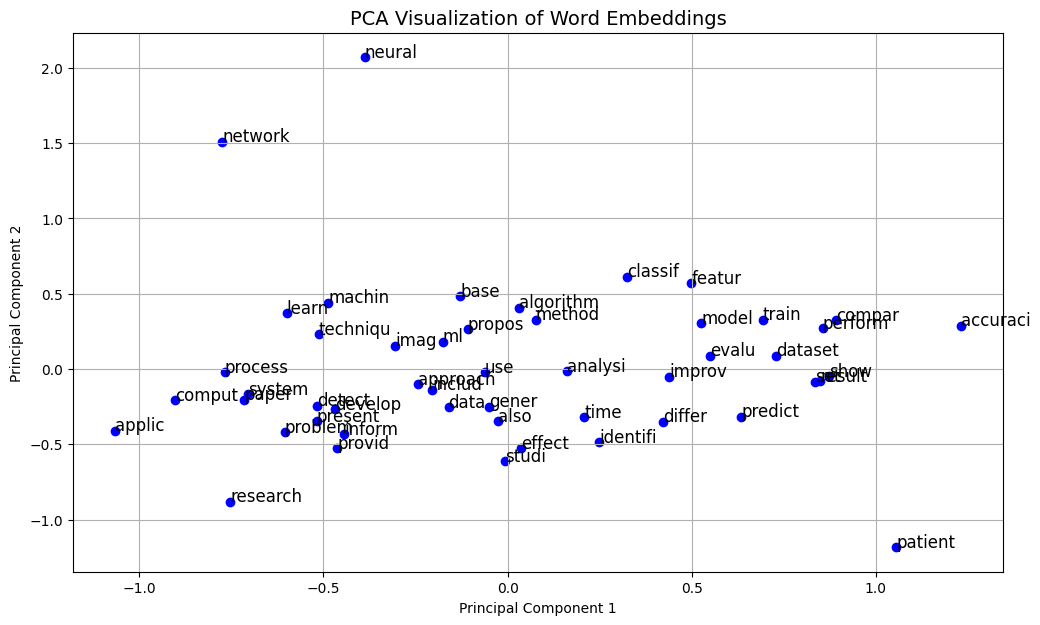

In [13]:
# counting most frequent words
word_counts = Counter([word for doc in tokenized_docs for word in doc])
most_common_words = [word for word, freq in word_counts.most_common(50)]  # Select top 50 words

# filtering words present in the word2vec model
words_to_visualize = [word for word in most_common_words if word in model.wv]

# defining function for pca visualization
def plot_pca(model, words):
    valid_words = [word for word in words if word in model.wv]

    if not valid_words:
        print("No words found in the vocabulary!")
        return

    word_vectors = np.array([model.wv[word] for word in valid_words])

    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(word_vectors)

    plt.figure(figsize=(12, 7))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], marker='o', color='blue')

    for i, word in enumerate(valid_words):
        plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=12)

    plt.title("PCA Visualization of Word Embeddings", fontsize=14)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid()
    plt.show()

# calling the function to visualize the embeddings
plot_pca(model, words_to_visualize)

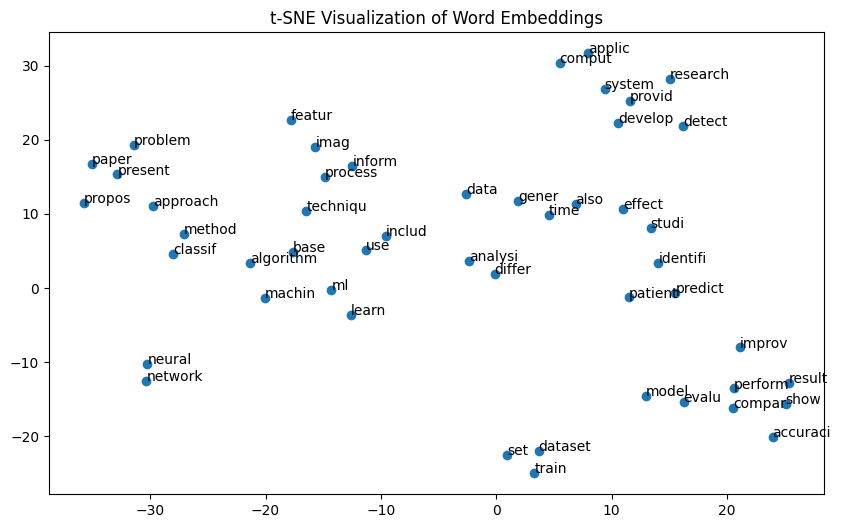

In [14]:
# visualizing word embeddings using T-sne
def plot_tsne(model, words):
    available_words = [word for word in words if word in model.wv]

    if len(available_words) < 2:
        print("Not enough words for t-SNE visualization.")
        return

    word_vectors = np.array([model.wv[word] for word in available_words])

    # dynamically adjust perplexity to avoid errors
    perplexity = min(5, len(available_words) - 1)

    # reducing dimensionality using t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    reduced_vectors = tsne.fit_transform(word_vectors)

    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], marker='o')

    for i, word in enumerate(available_words):
        plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]))

    plt.title("t-SNE Visualization of Word Embeddings")
    plt.show()

# using at least 10 words to ensure good visualization
words_to_visualize = [word for word in model.wv.index_to_key[:50]]  # select 50 most common words
plot_tsne(model, words_to_visualize)

In [15]:
# filtering words that exist in the model
valid_words = [word for word in most_common_words if word in model.wv]

# defining function to compute cosine similarity
def cosine_similarity(word1, word2, model):
    if word1 not in model.wv or word2 not in model.wv:
        return None  # avoiding keyerror if word is not in vocabulary

    vec1 = model.wv[word1]
    vec2 = model.wv[word2]
    similarity = 1 - cosine(vec1, vec2)
    return similarity

# selecting random word pairs for similarity calculation from df['Cleaned_Abstract']
if len(valid_words) >= 50:  # Ensure we have enough words to form pairs
    word_pairs = random.sample([(w1, w2) for w1 in valid_words for w2 in valid_words if w1 != w2], 500)
else:
    print("Not enough valid words found in dataset for similarity computation.")
    word_pairs = []  # fallback to empty list

# computing and printing similarity scores
print("\nWord Similarity Scores from df['Cleaned_Abstract']:")
for word1, word2 in word_pairs:
    sim = cosine_similarity(word1, word2, model)
    if sim is not None:
        print(f"Similarity between '{word1}' and '{word2}': {sim:.4f}")
    else:
        print(f"Skipping '{word1}' and '{word2}' (one or both not in vocabulary)")


Word Similarity Scores from df['Cleaned_Abstract']:
Similarity between 'data' and 'perform': 0.6171
Similarity between 'imag' and 'approach': 0.6823
Similarity between 'method' and 'problem': 0.7817
Similarity between 'differ' and 'method': 0.8434
Similarity between 'dataset' and 'neural': 0.5256
Similarity between 'improv' and 'classif': 0.8834
Similarity between 'studi' and 'present': 0.8871
Similarity between 'result' and 'includ': 0.5960
Similarity between 'network' and 'neural': 0.8807
Similarity between 'inform' and 'analysi': 0.7891
Similarity between 'problem' and 'gener': 0.8679
Similarity between 'featur' and 'use': 0.7235
Similarity between 'classif' and 'also': 0.7599
Similarity between 'effect' and 'neural': 0.4437
Similarity between 'dataset' and 'problem': 0.6184
Similarity between 'techniqu' and 'research': 0.7278
Similarity between 'propos' and 'comput': 0.6954
Similarity between 'method' and 'provid': 0.7723
Similarity between 'neural' and 'base': 0.8209
Similarity b

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [17]:
# 1. I would like to perform sentiment analysis on my dataset.

# 2. I used positive, negative, or neutral labeling Schema.

# The GitHub link of your final csv file
# Link: https://github.com/iamsudikshyadevkota/Sudikshya_INFO5731_Spring2025/blob/main/Labeled_Sentiment_Dataset.csv

# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [18]:
# I enjoyed working on this assignment. Every question is challenging and different.The deadline for the assignment was fine.